In [1]:
%matplotlib inline

# general
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import time

# modelling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression,lars_path,LassoCV,RidgeCV, ElasticNet
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, max_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [2]:
data_for_modeling = pd.read_csv('data/listings_cleaned_with_counts_final.csv', index_col=['id'])

In [3]:
data_all = pd.read_csv('data/listings.csv', index_col=['id'])
data_all = data_all.loc[data_for_modeling.index]

In [4]:
len(data_all) == len(data_for_modeling)

True

In [5]:
cols = ['neighbourhood_cleansed','property_type','room_type','bed_type','cancellation_policy']
cat_cols = data_all[cols]

In [6]:
data_for_modeling = pd.concat([data_for_modeling, cat_cols], axis=1)

In [7]:
data_for_modeling.head()

,host_listings_count,latitude,longitude,accommodates,bathrooms,price,security_deposit,cleaning_fee,extra_people,minimum_nights,...,bars,cafes,universities,cta,time_to_cta_minutes,neighbourhood_cleansed,property_type,room_type,bed_type,cancellation_policy
id,,,,,,,,,,,,,,,,,,,,,
1947,4,41.90246,-87.63405,2,1.0,59.0,100.0,0.0,0.0,14,...,50.0,56.0,2.0,3.0,4.66,Near North Side,Apartment,Entire home/apt,Real Bed,moderate
2384,1,41.78790,-87.58780,1,1.0,55.0,0.0,20.0,0.0,2,...,3.0,10.0,3.0,0.0,27.36,Hyde Park,Condominium,Private room,Real Bed,strict_14_with_grace_period
4505,1,41.85495,-87.69696,7,1.0,117.0,0.0,30.0,20.0,2,...,2.0,1.0,0.0,2.0,8.86,South Lawndale,Apartment,Entire home/apt,Real Bed,moderate
7126,2,41.90289,-87.68182,2,1.0,80.0,0.0,0.0,0.0,2,...,44.0,33.0,0.0,1.0,14.01,West Town,Apartment,Entire home/apt,Futon,moderate
9811,10,41.91769,-87.63788,4,1.0,150.0,0.0,85.0,25.0,4,...,40.0,20.0,1.0,2.0,11.24,Lincoln Park,Apartment,Entire home/apt,Real Bed,moderate


In [8]:
data_for_modeling = pd.get_dummies(data_for_modeling)
data_for_modeling.columns = data_for_modeling.columns.str.replace(' ','_')
data_for_modeling.head()

,host_listings_count,latitude,longitude,accommodates,bathrooms,price,security_deposit,cleaning_fee,extra_people,minimum_nights,...,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out_Sofa,bed_type_Real_Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
id,,,,,,,,,,,,,,,,,,,,,
1947,4,41.90246,-87.63405,2,1.0,59.0,100.0,0.0,0.0,14,...,0,0,0,0,1,0,1,0,0,0
2384,1,41.78790,-87.58780,1,1.0,55.0,0.0,20.0,0.0,2,...,0,0,0,0,1,0,0,1,0,0
4505,1,41.85495,-87.69696,7,1.0,117.0,0.0,30.0,20.0,2,...,0,0,0,0,1,0,1,0,0,0
7126,2,41.90289,-87.68182,2,1.0,80.0,0.0,0.0,0.0,2,...,0,0,1,0,0,0,1,0,0,0
9811,10,41.91769,-87.63788,4,1.0,150.0,0.0,85.0,25.0,4,...,0,0,0,0,1,0,1,0,0,0


In [9]:
data_for_modeling = data_for_modeling.fillna(0)

In [10]:
data_for_modeling.to_csv('data_for_modeling.csv')

In [11]:
X = data_for_modeling.drop('price', axis=1)
y = data_for_modeling.price

In [12]:
scaler = StandardScaler()
#X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))
y = pd.DataFrame(scaler.fit_transform(y.values.reshape(-1,1)))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [14]:
# Create instance of the model, `LinearRegression` function from 
# Scikit-Learn and fit the model on the training data:

lin_reg = LinearRegression()  
lin_reg.fit(X_train, y_train) #training the algorithm

# Now that the model has been fit we can make predictions by calling 
# the predict command. We are making predictions on the testing set:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, y_train_pred,squared=False),4))
print("Validation RMSE:", round(mean_squared_error(y_test, y_test_pred,squared=False),4))

print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

print("\nTraining Max Error:", round(max_error(y_train, y_train_pred),4))
print("Validation Max Error:", round(max_error(y_test, y_test_pred),4))

print("\nTraining MAE:", round(mean_absolute_error(y_train, y_train_pred),4))
print("Validation MAE:", round(mean_absolute_error(y_test, y_test_pred),4))


Training RMSE: 0.7351
Validation RMSE: 0.7085

Training r2: 0.474
Validation r2: 0.4026

Training Max Error: 6.5462
Validation Max Error: 4.8142

Training MAE: 0.4584
Validation MAE: 0.4525


In [15]:
y_test_array = np.array(y_test)
y_test_pred_array = np.array(y_test_pred)
new_df = pd.DataFrame({'Actual': y_test_array.flatten(), 'Predicted': y_test_pred_array.flatten()})

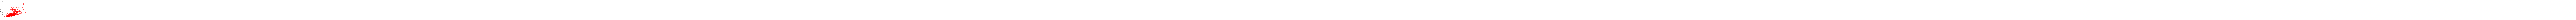

In [16]:
actual_values = y_test
plt.scatter(y_test_pred, actual_values, alpha=.7,
            color='r') #alpha helps to show overlapping data
#plt.plot([0,800],[0,800],color='blue')
#plt.grid(True)
overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    (round(r2_score(y_test, y_test_pred),4)),
                    (round(mean_squared_error(y_test, y_test_pred))),4)
plt.annotate(s=overlay,xy=(500,2.5),size='x-large')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('SHP Regression Model')
plt.show()

In [17]:
def lassocv(dataset,target):
  scaler = StandardScaler()
  dataset_scaled = scaler.fit_transform(dataset)
  target_transformed = scaler.fit_transform(target.values.reshape(-1,1))
  X_train, X_test, y_train, y_test = train_test_split(dataset_scaled,target_transformed, random_state=0,test_size = 0.25)
  alphas = 10**np.linspace(-2,3,200)
  lasso = LassoCV(alphas=alphas,cv=10,tol=0.1).fit(X_train, y_train.ravel())

  print("Train Score: {:.4f}".format(lasso.score(X_train, y_train)))
  print("Validation Score: {:.4f}".format(lasso.score(X_test, y_test)))
  print('Best alpha value: {:.3f}'.format(lasso.alpha_))
  
  y_pred = lasso.predict(X_test)
  labels = pd.qcut(y_pred, q=4,labels=['Cheap','Lower Middle','Upped Middle','Luxury'])
  plt.figure(figsize=(12,8))
  plt.scatter(y_test, y_pred)
  plt.plot([-2,5],[-2,5],color='blue')
  plt.grid(True)
  plt.title('Predicted vs. Actual Rental Price with LASSO CV')
  plt.ylabel('Rental Price Predicted')
  plt.xlabel('Rental Price Actual');

Train Score: 0.4551
Validation Score: 0.4637
Best alpha value: 0.010


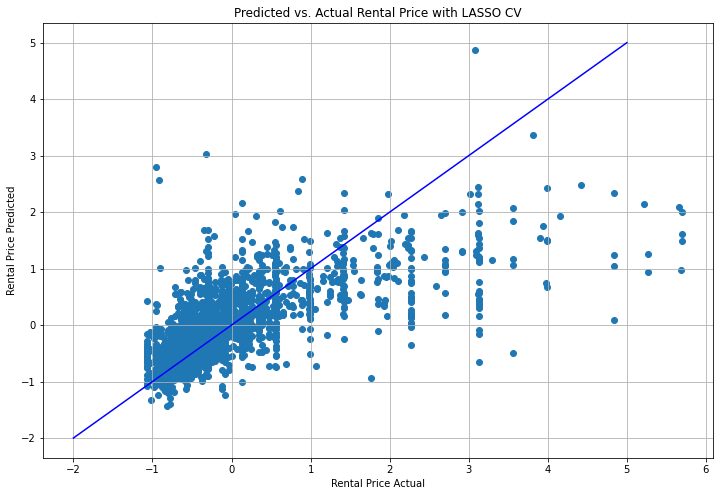

In [18]:
lassocv(X,y)

In [19]:
alphas = np.linspace(0,1,100)
ridge = RidgeCV(normalize=False,alphas=alphas,cv=5).fit(X_train, y_train) 
print("Validation R^2 Score: {:.4f}".format(ridge.score(X_test, y_test)))
print("Train R^2 Score: {:.4f}".format(ridge.score(X_train, y_train)))
print('Best alpha value: {:.3f}'.format(ridge.alpha_))

Validation R^2 Score: 0.4051
Train R^2 Score: 0.4730
Best alpha value: 1.000


In [20]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining RMSE:", round(mean_squared_error(y_train, training_preds_xgb_reg,squared=False),4))
print("Validation RMSE:", round(mean_squared_error(y_test, val_preds_xgb_reg,squared=False),4))

print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

print("\nTraining Max Error:", round(max_error(y_train, training_preds_xgb_reg),4))
print("Validation Max Error:", round(max_error(y_test, val_preds_xgb_reg),4))

print("\nTraining MAE:", round(mean_absolute_error(y_train, training_preds_xgb_reg),4))
print("Validation MAE:", round(mean_absolute_error(y_test, val_preds_xgb_reg),4))

Time taken to run: 0.1 minutes

Training RMSE: 0.2473
Validation RMSE: 0.6032

Training r2: 0.9405
Validation r2: 0.567

Training Max Error: 3.3159
Validation Max Error: 4.7258

Training MAE: 0.1667
Validation MAE: 0.3611


In [21]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.4, learning_rate = 0.15,
                max_depth = 4, reg_lambda=7.434, booster='gbtree')

In [22]:
import joblib
import pickle
#save model
pickle.dump(xg_reg, open('xgboost.pkl', "wb"))

#load saved model
#xgb = joblib.load(filename)

In [23]:
xg_reg_start = time.time()
xg_reg.fit(X_train,y_train)
training_preds_xg_reg = xg_reg.predict(X_train)
val_preds_xg_reg = xg_reg.predict(X_test)
xg_reg_end = time.time()

print(f"Time taken to run: {round((xg_reg_end - xg_reg_start)/60,1)} minutes")
print("\nTraining RMSE:", round(mean_squared_error(y_train, training_preds_xg_reg,squared=False),4))
print("Validation RMSE:", round(mean_squared_error(y_test, val_preds_xg_reg,squared=False),4))

print("\nTraining r2:", round(r2_score(y_train, training_preds_xg_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xg_reg),4))

print("\nTraining Max Error:", round(max_error(y_train, training_preds_xg_reg),4))
print("Validation Max Error:", round(max_error(y_test, val_preds_xg_reg),4))

print("\nTraining MAE:", round(mean_absolute_error(y_train, training_preds_xg_reg),4))
print("Validation MAE:", round(mean_absolute_error(y_test, val_preds_xg_reg),4))

Time taken to run: 0.0 minutes

Training RMSE: 0.5414
Validation RMSE: 0.6259

Training r2: 0.7147
Validation r2: 0.5339

Training Max Error: 5.3978
Validation Max Error: 4.5297

Training MAE: 0.3308
Validation MAE: 0.3814


In [24]:
from sklearn.neural_network import MLPRegressor
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# y_train_scaled = scaler.fit_transform(y_train)
# regr = MLPRegressor(random_state=1, max_iter=500,activation='relu', solver='adam').fit(X_train_scaled, y_train) 


steps_mlp = [('scaler', StandardScaler()), 
#('poly_features', PolynomialFeatures(2, interaction_only=False)), 
('mlp', MLPRegressor(random_state=1, max_iter=500,activation='relu', solver='adam',alpha=1))]

pipeline_mlp = Pipeline(steps=steps_mlp)
pipeline_mlp.fit(X_train,y_train)

print("\nTraining RMSE:", round(mean_squared_error(y_train, pipeline_mlp.predict(X_train),squared=False),4))
print("Validation RMSE:", round(mean_squared_error(y_test, pipeline_mlp.predict(X_test),squared=False),4))

print("\nTraining r2:", round(r2_score(y_train, pipeline_mlp.predict(X_train)),4))
print("Validation r2:", round(r2_score(y_test, pipeline_mlp.predict(X_test)),4))


Training RMSE: 0.5562
Validation RMSE: 0.6503

Training r2: 0.6989
Validation r2: 0.4967


In [25]:
from keras import models, layers, optimizers, regularizers
from IPython.display import SVG

In [26]:
nn3 = models.Sequential()
nn3.add(layers.Dense(128, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.010), activation='relu'))
nn3.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.010), activation='relu'))
nn3.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.010), activation='relu'))
nn3.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.010), activation='relu'))
nn3.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn3.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn3.summary())

# Visualising the neural network
#SVG(model_to_dot(nn3, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               17664     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 248,577
Trainable params: 248,577
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
nn3_start = time.time()

nn3_history = nn3.fit(X_train,
                  y_train,
                  epochs=150,
                  batch_size=256,
                  validation_split = 0.1)

nn3_end = time.time()

print(f"Time taken to run: {round((nn3_end - nn3_start)/60,1)} minutes")

===] - 0s 17ms/step - loss: 61.0203 - mean_squared_error: 0.5921 - val_loss: 60.8759 - val_mean_squared_error: 0.7330
Epoch 31/150
25/25 [==============================] - 0s 17ms/step - loss: 60.4845 - mean_squared_error: 0.5995 - val_loss: 60.3549 - val_mean_squared_error: 0.7463
Epoch 32/150
25/25 [==============================] - 0s 16ms/step - loss: 59.9603 - mean_squared_error: 0.6012 - val_loss: 59.8253 - val_mean_squared_error: 0.7344
Epoch 33/150
25/25 [==============================] - 0s 15ms/step - loss: 59.4495 - mean_squared_error: 0.6014 - val_loss: 59.3221 - val_mean_squared_error: 0.7419
Epoch 34/150
25/25 [==============================] - 0s 16ms/step - loss: 58.9280 - mean_squared_error: 0.5928 - val_loss: 58.7827 - val_mean_squared_error: 0.7136
Epoch 35/150
25/25 [==============================] - 0s 13ms/step - loss: 58.4209 - mean_squared_error: 0.5876 - val_loss: 58.3033 - val_mean_squared_error: 0.7278
Epoch 36/150
25/25 [==============================] - 0s 

In [28]:
def nn_model_evaluation(model, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    """
    For a given neural network model that has already been fit, prints for the train and tests sets the MSE and r squared
    values, a line graph of the loss in each epoch, and a scatterplot of predicted vs. actual values with a line
    representing where predicted = actual values. Optionally, a value for skip_epoch can be provided, which skips that
    number of epochs in the line graph of losses (useful in cases where the loss in the first epoch is orders of magnitude
    larger than subsequent epochs). Training and test sets can also optionally be specified.
    """

    # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    
    # Line graph of losses
    model_results = model.history.history
# plt.plot(list(range((skip_epochs+1),len(model_results['loss'])+1)), model_results['loss'][skip_epochs:], label='Train')
 #   plt.plot(list(range((skip_epochs+1),len(model_results['val_loss'])+1)), model_results['val_loss'][skip_epochs:], label='Test', color='green')
    plt.legend()
    plt.title('Training and test loss at each epoch', fontsize=14)
    plt.show()
    
    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()

No handles with labels found to put in legend.
Training MSE: 0.5986
Validation MSE: 0.5702

Training r2: 0.4174
Validation r2: 0.3215


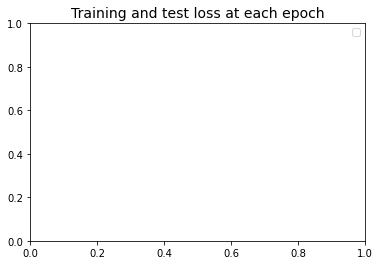

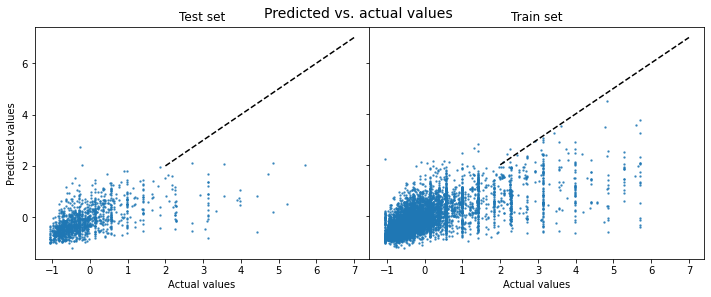

In [29]:
nn_model_evaluation(nn3, skip_epochs=2)

In [30]:
nn3.history.history

{}

### OTHER

In [31]:
import joblib
#save model
joblib.dump(xgb, filename) 

#load saved model
xgb = joblib.load(filename)

NameError: name 'filename' is not defined

In [32]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [33]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':"reg:squarederror",  
}

In [34]:
params['eval_metric'] = "rmse"

In [35]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=999,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:0.90468
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:0.80547
[2]	Test-rmse:0.74638
[3]	Test-rmse:0.70516
[4]	Test-rmse:0.68195
[5]	Test-rmse:0.66071
[6]	Test-rmse:0.64987
[7]	Test-rmse:0.64109
[8]	Test-rmse:0.63412
[9]	Test-rmse:0.62840
[10]	Test-rmse:0.62303
[11]	Test-rmse:0.62138
[12]	Test-rmse:0.61832
[13]	Test-rmse:0.61581
[14]	Test-rmse:0.61495
[15]	Test-rmse:0.61369
[16]	Test-rmse:0.61127
[17]	Test-rmse:0.61020
[18]	Test-rmse:0.61196
[19]	Test-rmse:0.61225
[20]	Test-rmse:0.61164
[21]	Test-rmse:0.61083
[22]	Test-rmse:0.60984
[23]	Test-rmse:0.60947
[24]	Test-rmse:0.60901
[25]	Test-rmse:0.60510
[26]	Test-rmse:0.60528
[27]	Test-rmse:0.60539
[28]	Test-rmse:0.60408
[29]	Test-rmse:0.60477
[30]	Test-rmse:0.60511
[31]	Test-rmse:0.60167
[32]	Test-rmse:0.60216
[33]	Test-rmse:0.60127
[34]	Test-rmse:0.60169
[35]	Test-rmse:0.59981
[36]	Test-rmse:0.60028
[37]	Test-rmse:0.59962
[38]	Test-rmse:0.60030
[39]	Test-rmse:0.60140
[40]	Test-rmse:0.60107
[41]	Test-

In [36]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=999,
    seed=42,
    nfold=12,
    metrics='rmse',
    early_stopping_rounds=10
)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.928636,0.003658,0.945314,0.049855
1,0.802201,0.003211,0.842001,0.051012
2,0.715566,0.005252,0.774147,0.051331
3,0.654808,0.006841,0.733544,0.050381
4,0.611338,0.007402,0.706942,0.048541
5,0.579157,0.007833,0.689511,0.045066
6,0.554028,0.007362,0.678418,0.046936
7,0.534551,0.006749,0.670430,0.046161
8,0.517752,0.006803,0.661908,0.045471
9,0.504884,0.007120,0.657343,0.046227


In [37]:
# gridsearch_params = [
#     (max_depth, min_child_weight)
#     for max_depth in range(2,6)
#     for min_child_weight in range(1,3)
# ]

In [38]:
# # Define initial best params and MAE
# min_rmse = float("Inf")
# best_params = None
# for max_depth, min_child_weight in gridsearch_params:
#     print("CV with max_depth={}, min_child_weight={}".format(
#                              max_depth,
#                              min_child_weight))
#     # Update our parameters
#     params['max_depth'] = max_depth
#     params['min_child_weight'] = min_child_weight
#     # Run CV
#     cv_results = xgb.cv(
#         params,
#         dtrain,
#         num_boost_round=999,
#         seed=42,
#         nfold=12,
#         metrics={'rmse'},
#         early_stopping_rounds=10
#     )
#     # Update best MAE
#     mean_rmse = cv_results['test-rmse-mean'].min()
#     boost_rounds = cv_results['test-rmse-mean'].argmin()
#     print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
#     if mean_rmse < min_rmse:
#         min_rmse = mean_rmse
#         best_params = (max_depth,min_child_weight)
# print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

In [39]:
params['max_depth'] = 5
params['min_child_weight'] = 2

In [40]:
# gridsearch_params = [
#     (subsample, colsample)
#     for subsample in np.linspace(0.9,1,10)
#     for colsample in np.linspace(0.6,0.9,10)
# ]

In [41]:
# min_mae = float("Inf")
# best_params = None
# # We start by the largest values and go down to the smallest
# for subsample, colsample in gridsearch_params:
#     print("CV with subsample={}, colsample={}".format(
#                              subsample,
#                              colsample))
#     # We update our parameters
#     params['subsample'] = subsample
#     params['colsample_bytree'] = colsample
#     # Run CV
#     cv_results = xgb.cv(
#         params,
#         dtrain,
#         num_boost_round=999,
#         seed=42,
#         nfold=12,
#         metrics={'rmse'},
#         early_stopping_rounds=10
#     )
#     # Update best score
#     mean_rmse = cv_results['test-rmse-mean'].min()
#     boost_rounds = cv_results['test-rmse-mean'].argmin()
#     print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
#     if mean_rmse < min_rmse:
#         min_rmse = mean_rmse
#         best_params = (subsample,colsample)
# print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

In [42]:
params['subsample'] = 0.975
params['colsample_bytree'] = 0.675

In [43]:
params

{'max_depth': 5,
 'min_child_weight': 2,
 'eta': 0.3,
 'subsample': 0.975,
 'colsample_bytree': 0.675,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse'}

In [44]:
params['eta'] = .03

In [45]:
params

{'max_depth': 5,
 'min_child_weight': 2,
 'eta': 0.03,
 'subsample': 0.975,
 'colsample_bytree': 0.675,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse'}

In [46]:
params = {
    # Parameters that we are going to tune.
    'max_depth':4,
    'min_child_weight': 1,
    'eta':.15,
    'subsample': 0.6,
    'lambda': 7.434,
    'colsample_bytree' : 0.4,
    # Other parameters
    'objective':"reg:squarederror",  
}

In [47]:
 cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=250,
        seed=42,
        nfold=4,
        metrics={'rmse'},
        early_stopping_rounds=10
    )

In [48]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=250,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:0.99358
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:0.93141
[2]	Test-rmse:0.89611
[3]	Test-rmse:0.87232
[4]	Test-rmse:0.83279
[5]	Test-rmse:0.79788
[6]	Test-rmse:0.78191
[7]	Test-rmse:0.75857
[8]	Test-rmse:0.73682
[9]	Test-rmse:0.72056
[10]	Test-rmse:0.70899
[11]	Test-rmse:0.70299
[12]	Test-rmse:0.69838
[13]	Test-rmse:0.69322
[14]	Test-rmse:0.68636
[15]	Test-rmse:0.68075
[16]	Test-rmse:0.67714
[17]	Test-rmse:0.67446
[18]	Test-rmse:0.66964
[19]	Test-rmse:0.66423
[20]	Test-rmse:0.66180
[21]	Test-rmse:0.65909
[22]	Test-rmse:0.65545
[23]	Test-rmse:0.65345
[24]	Test-rmse:0.65129
[25]	Test-rmse:0.65067
[26]	Test-rmse:0.65016
[27]	Test-rmse:0.64712
[28]	Test-rmse:0.64491
[29]	Test-rmse:0.64313
[30]	Test-rmse:0.64353
[31]	Test-rmse:0.64231
[32]	Test-rmse:0.64175
[33]	Test-rmse:0.63995
[34]	Test-rmse:0.63775
[35]	Test-rmse:0.63705
[36]	Test-rmse:0.63693
[37]	Test-rmse:0.63680
[38]	Test-rmse:0.63649
[39]	Test-rmse:0.63653
[40]	Test-rmse:0.63595
[41]	Test-

In [49]:
preds_train = model.predict(dtrain)
preds_test = model.predict(dtest)

In [50]:
print("\nTraining RMSE:", round(mean_squared_error(y_train, preds_train,squared=False),4))
print("Validation RMSE:", round(mean_squared_error(y_test, preds_test,squared=False),4))

print("\nTraining r2:", round(r2_score(y_train, preds_train),4))
print("Validation r2:", round(r2_score(y_test, preds_test),4))

print("\nTraining Max Error:", round(max_error(y_train, preds_train),4))
print("Validation Max Error:", round(max_error(y_test, preds_test),4))

print("\nTraining MAE:", round(mean_absolute_error(y_train, preds_train),4))
print("Validation MAE:", round(mean_absolute_error(y_test, preds_test),4))


Training RMSE: 0.5313
Validation RMSE: 0.6198

Training r2: 0.7252
Validation r2: 0.5428

Training Max Error: 5.2586
Validation Max Error: 4.7319

Training MAE: 0.3256
Validation MAE: 0.3796


In [51]:
#xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
#                max_depth = 5, alpha = 0.010, booster='gbtree')



# Various hyper-parameters to tune
xgb1 = xgb.XGBRegressor()
parameters = {'objective': ['reg:squarederror'], 'learning_rate': [.01, 0.1, 0.2], 'max_depth': [4, 5, 6], 'min_child_weight': [1,2,3],'silent': [1],'subsample': [0.7,0.8,0.9,1],'colsample_bytree': [0.6,0.7,0.8],'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 1,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:25:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:25:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:26:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\